Parameter Input

In [1]:
'''# Input parameters
x_stl = 0.002
y_stl = 0.0
z_stl = 0.006
Lx = 0.009
Ly = 0.01
Lz = 0.011
dx = 1e-6
CFL = 0.01
ratio = 0.5
flow_direction = '+x'
density = 4.2095e-01
kinematic_viscosity = 8.5353e-05
velocity = 8.403
delta = 6
percentage = 1 / 100

dt2 = 1e-8

# Flags for periodicity should be boolean
is_periodic_x = 0
is_periodic_y = 1
is_periodic_z = 1
'''

"# Input parameters\nx_stl = 0.002\ny_stl = 0.0\nz_stl = 0.006\nLx = 0.009\nLy = 0.01\nLz = 0.011\ndx = 1e-6\nCFL = 0.01\nratio = 0.5\nflow_direction = '+x'\ndensity = 4.2095e-01\nkinematic_viscosity = 8.5353e-05\nvelocity = 8.403\ndelta = 6\npercentage = 1 / 100\n\ndt2 = 1e-8\n\n# Flags for periodicity should be boolean\nis_periodic_x = 0\nis_periodic_y = 1\nis_periodic_z = 1\n"

In [2]:
# Input parameters
x_stl = 0.00593582
y_stl = 0.008
z_stl = 0.00593582
Lx = 0.02
Ly = 0.01
Lz = 0.01
dx = 2.5e-05
CFL = 0.001
ratio = 0.5
flow_direction = '+x'
density = 1.1225
kinematic_viscosity = 1.6058e-05
velocity = 0.1
delta = 6
percentage =    50 / 100
dt2 = 4e-09
# Flags for periodicity should be boolean
is_periodic_x = 0
is_periodic_y = 1
is_periodic_z = 1

In [3]:
#CORRECTLYWORKING CALCULATION

# STL box dimensions
xmin_stl = x_stl
xmax_stl = x_stl + Lx
ymin_stl = y_stl
ymax_stl = y_stl + Ly
zmin_stl = z_stl
zmax_stl = z_stl + Lz

# Calculate the number of grid points based on dx and lengths
Nx_full = round(Lx / dx)
Ny_full = round(Ly / dx)
Nz_full = round(Lz / dx)

# Initialize mesh box coordinates
xmin_mesh = xmax_mesh = ymin_mesh = ymax_mesh = zmin_mesh = zmax_mesh = 0

# Adjust grid points for the percentage of the STL box dimensions
# For the periodic direction, we subtract delta grid points
# For the non-periodic direction, we add delta grid points
if is_periodic_x:
    Nx = round(percentage * Nx_full) - delta
    xmin_mesh = x_stl + (Lx - (Nx * dx)) / 2
    xmax_mesh = xmin_mesh + Nx * dx
else:
    Nx = Nx_full + delta
    xmin_mesh = x_stl - ((delta / 2) * dx)
    xmax_mesh = xmin_mesh + Nx * dx

if is_periodic_y:
    Ny = round(percentage * Ny_full) - delta
    ymin_mesh = y_stl + (Ly - (Ny * dx)) / 2
    ymax_mesh = ymin_mesh + Ny * dx
else:
    Ny = Ny_full + delta
    ymin_mesh = y_stl - ((delta / 2) * dx)
    ymax_mesh = ymin_mesh + Ny * dx

if is_periodic_z:
    Nz = round(percentage * Nz_full) - delta
    zmin_mesh = z_stl + (Lz - (Nz * dx)) / 2
    zmax_mesh = zmin_mesh + Nz * dx
else:
    Nz = Nz_full + delta
    zmin_mesh = z_stl - ((delta / 2) * dx)
    zmax_mesh = zmin_mesh + Nz * dx

# Corrected code for sub box dimensions based on flow direction and the ratio, dividing the STL box into two parts
# Sub box 1 and 2 dimensions based on flow direction
if flow_direction == '+x':
    # Divide along x-direction
    xmin_sub1 = xmin_mesh
    xmax_sub1 = xmin_mesh + ratio * (xmax_mesh - xmin_mesh)
    ymin_sub1 = ymin_mesh
    ymax_sub1 = ymax_mesh
    zmin_sub1 = zmin_mesh
    zmax_sub1 = zmax_mesh

    xmin_sub2 = xmax_sub1
    xmax_sub2 = xmax_mesh
    ymin_sub2 = ymin_mesh
    ymax_sub2 = ymax_mesh
    zmin_sub2 = zmin_mesh
    zmax_sub2 = zmax_mesh

elif flow_direction == '+y':
    # Divide along y-direction
    xmin_sub1 = xmin_mesh
    xmax_sub1 = xmax_mesh
    ymin_sub1 = ymin_mesh
    ymax_sub1 = ymin_mesh + ratio * (ymax_mesh - ymin_mesh)
    zmin_sub1 = zmin_mesh
    zmax_sub1 = zmax_mesh

    xmin_sub2 = xmin_mesh
    xmax_sub2 = xmax_mesh
    ymin_sub2 = ymax_sub1
    ymax_sub2 = ymax_mesh
    zmin_sub2 = zmin_mesh
    zmax_sub2 = zmax_mesh

elif flow_direction == '+z':
    # Divide along z-direction
    xmin_sub1 = xmin_mesh
    xmax_sub1 = xmax_mesh
    ymin_sub1 = ymin_mesh
    ymax_sub1 = ymax_mesh
    zmin_sub1 = zmin_mesh
    zmax_sub1 = zmin_mesh + ratio * (zmax_mesh - zmin_mesh)

    xmin_sub2 = xmin_mesh
    xmax_sub2 = xmax_mesh
    ymin_sub2 = ymin_mesh
    ymax_sub2 = ymax_mesh
    zmin_sub2 = zmax_sub1
    zmax_sub2 = zmax_mesh

# Initial values for simulation parameters
dt = CFL * dx / velocity
Fo = kinematic_viscosity * dt / (dx ** 2)
dynamic_viscosity = kinematic_viscosity * density
Tau = 0.5 + ((3 * kinematic_viscosity * dt) / (dx ** 2))
P = (density * (dx / dt) ** 2) / 3
P2 = (density * (dx / dt2) ** 2) / 3
calculated_CFL = (velocity*dt2)/dx
# Display the results
print('--- Results ---')
print(f'Input file Data:    {dx} {xmin_mesh:.6f} {ymin_mesh:.6f} {zmin_mesh:.6f}')
print(f'                    {dx} {dt:.3e} {Nx} {Ny} {Nz}\n')
print(f'CFL: {CFL}')
print(f'dx: {dx}')
print(f'Time step (dt): {dt:.3e}')
print(f'Number of grid points (Nx, Ny, Nz): {Nx} {Ny} {Nz}')
print(f'New origin points (x0, y0, z0): {xmin_mesh:.6f} {ymin_mesh:.6f} {zmin_mesh:.6f}')
print(f'STL box x0 x1 y0 y1 z0 z1:      Tanh {xmin_stl:.6f} {xmax_stl:.6f} {ymin_stl:.6f} {ymax_stl:.6f} {zmin_stl:.6f} {zmax_stl:.6f} 0.0001')
print(f'Mesh box x0 x1 y0 y1 z0 z1:     Tanh {xmin_mesh:.6f} {xmax_mesh:.6f} {ymin_mesh:.6f} {ymax_mesh:.6f} {zmin_mesh:.6f} {zmax_mesh:.6f} 0.0001')
print(f'Sub box 1 x0 x1 y0 y1 z0 z1:    Tanh {xmin_sub1:.6f} {xmax_sub1:.6f} {ymin_sub1:.6f} {ymax_sub1:.6f} {zmin_sub1:.6f} {zmax_sub1:.6f} 0.0001')
print(f'Sub box 2 x0 x1 y0 y1 z0 z1:    Tanh {xmin_sub2:.6f} {xmax_sub2:.6f} {ymin_sub2:.6f} {ymax_sub2:.6f} {zmin_sub2:.6f} {zmax_sub2:.6f} 0.0001')
print(f'Maximum Velocity: {velocity}')
print(f'Pressure: {P:.6f}')
print(f'Pressure2: {P2:.6f}')
print(f'Calculated CFL: {calculated_CFL:.6f}')
if 0.6 < Tau < 1.1 and 1 / 300 < Fo < 1 / 3:
    print("Good Tau (0.6 < Tau < 1.1):", Tau)
    print(f'Fo (0.0033 < Fo < 0.3333): {Fo}')
else:
    print('Recalculate Tau: ', Tau)

--- Results ---
Input file Data:    2.5e-05 0.005861 0.010575 0.008511
                    2.5e-05 2.500e-07 806 194 194

CFL: 0.001
dx: 2.5e-05
Time step (dt): 2.500e-07
Number of grid points (Nx, Ny, Nz): 806 194 194
New origin points (x0, y0, z0): 0.005861 0.010575 0.008511
STL box x0 x1 y0 y1 z0 z1:      Tanh 0.005936 0.025936 0.008000 0.018000 0.005936 0.015936 0.0001
Mesh box x0 x1 y0 y1 z0 z1:     Tanh 0.005861 0.026011 0.010575 0.015425 0.008511 0.013361 0.0001
Sub box 1 x0 x1 y0 y1 z0 z1:    Tanh 0.005861 0.015936 0.010575 0.015425 0.008511 0.013361 0.0001
Sub box 2 x0 x1 y0 y1 z0 z1:    Tanh 0.015936 0.026011 0.010575 0.015425 0.008511 0.013361 0.0001
Maximum Velocity: 0.1
Pressure: 3741.666667
Pressure2: 14615885.416667
Calculated CFL: 0.000016
Recalculate Tau:  0.5192696


In [4]:
print("c\tGeometry")
print("#key\tfiles\tdx\tx_c\ty_c\tz_c")
print(f"stl\t3\t{dx}\t{xmin_mesh:.6f}\t{ymin_mesh:.6f}\t{zmin_mesh:.6f}\n\n")

print("c\tGeneral")
print("#Dx\tDt\t\tNx\tNy\tNz")
print(f"{dx}\t{dt:.3e}\t{Nx}\t{Ny}\t{Nz}\n")

print("c\tFlame properties")
print("#Stiffness\txFlamePos")
print(f"3000.0\t\t{xmin_sub2:.6f}\n")

print("c\tTemperature Field Initial Conditions\n")
print(f'Tanh\t{xmin_sub2:.6f}\t{xmax_sub2:.6f}\t{ymin_sub2:.6f}\t{ymax_sub2:.6f}\t{zmin_sub2:.6f}\t{zmax_sub2:.6f}\t0.0001')

c	Geometry
#key	files	dx	x_c	y_c	z_c
stl	3	2.5e-05	0.005861	0.010575	0.008511


c	General
#Dx	Dt		Nx	Ny	Nz
2.5e-05	2.500e-07	806	194	194

c	Flame properties
#Stiffness	xFlamePos
3000.0		0.015936

c	Temperature Field Initial Conditions

Tanh	0.015936	0.026011	0.010575	0.015425	0.008511	0.013361	0.0001


In [5]:
#sphere and box calculations
def calculate_sphere_coordinates(x_stl, Lx, y_stl, Ly, z_stl, Lz, flow_direction):
  
    # Map the flow direction to its corresponding center and radius calculations
    flow_mapping = {
        '+x': (x_stl, Lx / 2),
        '-x': (x_stl + Lx, Lx / 2),
        '+y': (y_stl, Ly / 2),
        '-y': (y_stl + Ly, Ly / 2),
        '+z': (z_stl, Lz / 2),
        '-z': (z_stl + Lz, Lz / 2)
    }

    if flow_direction in flow_mapping:
        if 'x' in flow_direction:
            x_center, R = flow_mapping[flow_direction]
            y_center = y_stl + Ly * 0.5
            z_center = z_stl + Lz * 0.5
        elif 'y' in flow_direction:
            y_center, R = flow_mapping[flow_direction]
            x_center = x_stl + Lx * 0.5
            z_center = z_stl + Lz * 0.5
        else:  # 'z' in flow_direction
            z_center, R = flow_mapping[flow_direction]
            x_center = x_stl + Lx * 0.5
            y_center = y_stl + Ly * 0.5
    else:
        valid_directions = ', '.join(flow_mapping.keys())
        raise ValueError(f"Invalid flow direction. Valid options are: {valid_directions}.")

    # Update the calculation of sphere radius
    if flow_direction in ('+x', '-x'):
        R = (Ly) / 2
    elif flow_direction in ('+y', '-y'):
        R = (Lz) / 2
    elif flow_direction in ('+z', '-z'):
        R = (Lx) / 2
    else:
        raise ValueError("Invalid flow direction. Use '+x', '-x', '+y', '-y', '+z', or '-z'.")

    return x_center, y_center, z_center, R

# Function to plot a sphere given its center and radius
def plot_sphere(ax, center, radius, color):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color=color, alpha=0.6)
    
# Calculate sphere coordinates for the mesh box
sphere_mesh = calculate_sphere_coordinates(
    x_stl=xmin_mesh, Lx=xmax_mesh-xmin_mesh,
    y_stl=ymin_mesh, Ly=ymax_mesh-ymin_mesh,
    z_stl=zmin_mesh, Lz=zmax_mesh-zmin_mesh,
    flow_direction=flow_direction
)

# Calculate sphere coordinates for sub box 2
sphere_sub2 = calculate_sphere_coordinates(
     x_stl=xmin_sub2, Lx=xmax_sub2-xmin_sub2,
     y_stl=ymin_sub2, Ly=ymax_sub2-ymin_sub2,
     z_stl=zmin_sub2, Lz=zmax_sub2-zmin_sub2,
    flow_direction=flow_direction
)

# Function to create a 3D box based on the min and max x, y, z coordinates
def create_box(xmin, xmax, ymin, ymax, zmin, zmax, color):
    # Define the vertices of the box
    vertices = np.array([[xmin, ymin, zmin],
                         [xmax, ymin, zmin],
                         [xmax, ymax, zmin],
                         [xmin, ymax, zmin],
                         [xmin, ymin, zmax],
                         [xmax, ymin, zmax],
                         [xmax, ymax, zmax],
                         [xmin, ymax, zmax]])
    # Define the sides of the box (each as a list of vertex indices)
    faces = [[vertices[j] for j in [0,1,2,3]], [vertices[j] for j in [4,5,6,7]], 
             [vertices[j] for j in [0,1,5,4]], [vertices[j] for j in [2,3,7,6]], 
             [vertices[j] for j in [1,2,6,5]], [vertices[j] for j in [4,7,3,0]]]
    
    # Create a 3D poly collection
    box = Poly3DCollection(faces, facecolors=color, edgecolors='k', label='l', linewidths=1, alpha=0.2)
    #box.set_facecolor(color)
    return box

In [6]:
print(f'STL box x0 x1 y0 y1 z0 z1:      Tanh {xmin_stl:.6f} {xmax_stl:.6f} {ymin_stl:.6f} {ymax_stl:.6f} {zmin_stl:.6f} {zmax_stl:.6f} 0.0001')
print(f'Mesh box x0 x1 y0 y1 z0 z1:     Tanh {xmin_mesh:.6f} {xmax_mesh:.6f} {ymin_mesh:.6f} {ymax_mesh:.6f} {zmin_mesh:.6f} {zmax_mesh:.6f} 0.0001')
print(f'Sub box 1 x0 x1 y0 y1 z0 z1:    Tanh {xmin_sub1:.6f} {xmax_sub1:.6f} {ymin_sub1:.6f} {ymax_sub1:.6f} {zmin_sub1:.6f} {zmax_sub1:.6f} 0.0001')
print(f'Sub box 2 x0 x1 y0 y1 z0 z1:    Tanh {xmin_sub2:.6f} {xmax_sub2:.6f} {ymin_sub2:.6f} {ymax_sub2:.6f} {zmin_sub2:.6f} {zmax_sub2:.6f} 0.0001')

# Printing out the results
print("Sphere Mesh Coords & R:", sphere_mesh)
print("Sphere Sub Box 2 Coords & R:", sphere_sub2)

STL box x0 x1 y0 y1 z0 z1:      Tanh 0.005936 0.025936 0.008000 0.018000 0.005936 0.015936 0.0001
Mesh box x0 x1 y0 y1 z0 z1:     Tanh 0.005861 0.026011 0.010575 0.015425 0.008511 0.013361 0.0001
Sub box 1 x0 x1 y0 y1 z0 z1:    Tanh 0.005861 0.015936 0.010575 0.015425 0.008511 0.013361 0.0001
Sub box 2 x0 x1 y0 y1 z0 z1:    Tanh 0.015936 0.026011 0.010575 0.015425 0.008511 0.013361 0.0001
Sphere Mesh Coords & R: (0.005860819999999999, 0.013000000000000001, 0.010935819999999999, 0.002425)
Sphere Sub Box 2 Coords & R: (0.01593582, 0.013000000000000001, 0.010935819999999999, 0.002425)


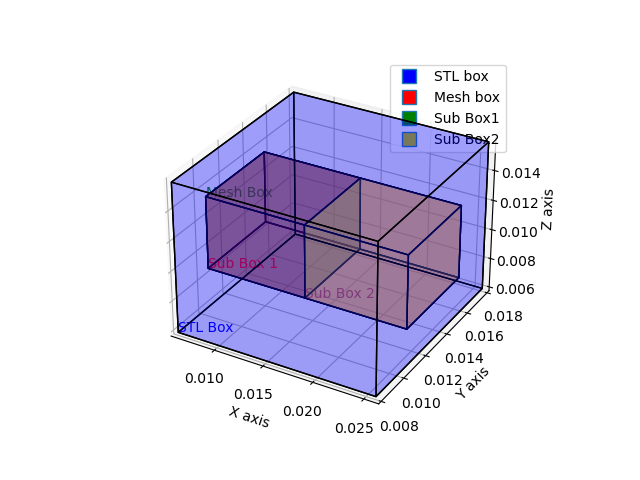

In [7]:
#PLOT WORKING
%matplotlib widget
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
plt.close()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# STL box
stl_box = create_box(xmin_stl, xmax_stl, ymin_stl, ymax_stl, zmin_stl, zmax_stl, 'blue')
# Mesh box
mesh_box = create_box(xmin_mesh, xmax_mesh, ymin_mesh, ymax_mesh, zmin_mesh, zmax_mesh, 'red')
# Sub Box1
sub_box1 = create_box(xmin_sub1, xmax_sub1, ymin_sub1, ymax_sub1, zmin_sub1, zmax_sub1, 'green')
# Sub Box1
sub_box2 = create_box(xmin_sub2, xmax_sub2, ymin_sub2, ymax_sub2, zmin_sub2, zmax_sub2, 'yellow')

ax.add_collection3d(stl_box)
ax.add_collection3d(mesh_box)
ax.add_collection3d(sub_box1)
ax.add_collection3d(sub_box2)

# Add labels
ax.text(xmin_stl, ymin_stl, zmin_stl, "STL Box", color='blue')
ax.text(xmin_mesh, ymin_mesh, zmax_mesh, "Mesh Box", color='green')
ax.text(xmin_sub1, ymin_sub1, zmin_sub1, "Sub Box 1", color='red')
ax.text(xmin_sub2, ymin_sub2, zmin_sub2, "Sub Box 2", color='purple')

# Set plot limits
ax.set_xlim(min(xmin_stl, xmin_mesh), max(xmax_stl, xmax_mesh))
ax.set_ylim(min(ymin_stl, ymin_mesh), max(ymax_stl, ymax_mesh))
ax.set_zlim(min(zmin_stl, zmin_mesh), max(zmax_stl, zmax_mesh))

# Setting the labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
#
# Setting the legend
blue_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='b')
red_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='r')
green_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='g')
yellow_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='y')
ax.legend([blue_patch, red_patch, green_patch, yellow_patch], ['STL box', 'Mesh box', 'Sub Box1', 'Sub Box2'])
#ax.legend([red_patch, yellow_patch], ['Mesh box', 'Sub Box2'])

plt.show()


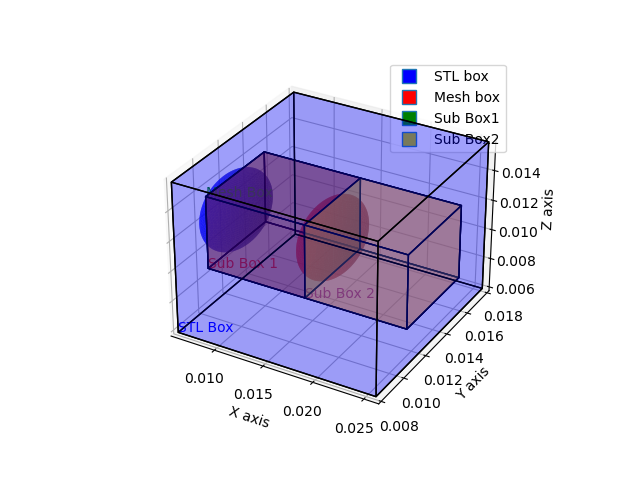

In [8]:
# Create a 3D plot
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# STL box
stl_box = create_box(xmin_stl, xmax_stl, ymin_stl, ymax_stl, zmin_stl, zmax_stl, 'blue')
# Mesh box
mesh_box = create_box(xmin_mesh, xmax_mesh, ymin_mesh, ymax_mesh, zmin_mesh, zmax_mesh, 'red')
# Sub Box1
sub_box1 = create_box(xmin_sub1, xmax_sub1, ymin_sub1, ymax_sub1, zmin_sub1, zmax_sub1, 'green')
# Sub Box1
sub_box2 = create_box(xmin_sub2, xmax_sub2, ymin_sub2, ymax_sub2, zmin_sub2, zmax_sub2, 'yellow')

ax.add_collection3d(stl_box)
ax.add_collection3d(mesh_box)
ax.add_collection3d(sub_box1)
ax.add_collection3d(sub_box2)

# Add labels
ax.text(xmin_stl, ymin_stl, zmin_stl, "STL Box", color='blue')
ax.text(xmin_mesh, ymin_mesh, zmax_mesh, "Mesh Box", color='green')
ax.text(xmin_sub1, ymin_sub1, zmin_sub1, "Sub Box 1", color='red')
ax.text(xmin_sub2, ymin_sub2, zmin_sub2, "Sub Box 2", color='purple')


# Calculate sphere coordinates
#sphere_mesh = calculate_sphere_coordinates(xmin_mesh, xmax_mesh, ymin_mesh, ymax_mesh, zmin_mesh, zmax_mesh, flow_direction,ratio)
#sphere_sub2 = calculate_sphere_coordinates(xmin_sub2, xmax_sub2, ymin_sub2, ymax_sub2, zmin_sub2, zmax_sub2, flow_direction,ratio)

# Plot the spheres with the 'plot_sphere' function
plot_sphere(ax, sphere_mesh[:3], sphere_mesh[3], 'blue')  # Sphere for mesh box in blue
plot_sphere(ax, sphere_sub2[:3], sphere_sub2[3], 'red')  # Sphere for sub box 2 in red

# Setting the legend
blue_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='b')
red_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='r')
green_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='g')
yellow_patch = plt.Line2D([0], [0], linestyle="none", marker='s', markersize=10, markerfacecolor='y')
ax.legend([blue_patch, red_patch, green_patch, yellow_patch], ['STL box', 'Mesh box', 'Sub Box1', 'Sub Box2'])

# Set plot limits
ax.set_xlim(min(xmin_stl, xmin_mesh), max(xmax_stl, xmax_mesh))
ax.set_ylim(min(ymin_stl, ymin_mesh), max(ymax_stl, ymax_mesh))
ax.set_zlim(min(zmin_stl, zmin_mesh), max(zmax_stl, zmax_mesh))

# Setting the labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()
plt.savefig(f'Data/Mesh_'+ str(percentage) +'.png', dpi=300)